In [120]:
# Basic data and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)

# Load CSV file (change path if needed)
df = pd.read_csv("../data/raw/cardio_train.csv", sep=';')

# Quick look
df.head()

# Dataset shape
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Info and missing values
df.info()

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

print("Shape:", df.shape)
df.info()

Rows: 70000
Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Duplicate rows: 0
Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 

The output shows the dataset contains 70,000 rows and 13 columns with no missing values across all features. The dataset includes patient information such as age (in days), gender, height, weight, blood pressure readings (ap_hi and ap_lo), cholesterol and glucose levels, lifestyle factors (smoke, alco, active), and the target variable (cardio). Notably, there are 0 duplicate rows, indicating clean data entry. The age stored in days (ranging from 10,798 to 23,713 days, approximately 29.5 to 65 years) suggests deliberate anonymization. Most features use integer encoding: gender (1=female, 2=male), and ordinal scales for cholesterol, glucose, and binary flags for lifestyle factors.

In [121]:
# Descriptive Statistics um abweichungen oder komischen werten zu erkennen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


The descriptive statistics reveal several data quality issues requiring attention. Height shows extreme values ranging from 55 cm (implausible for adults) to 250 cm, with a median of 165 cm. Weight ranges from 10 kg to 200 kg with a median of 72 kg. Blood pressure readings show concerning anomalies: ap_hi ranges from -150 to 16,020 mmHg and ap_lo from -70 to 11,000 mmHg, far beyond physiologically possible values. These extreme outliers suggest data entry errors or sensor malfunctions. The mean age is approximately 53.4 years (19,469 days). The cardio target variable shows nearly balanced classes with a mean of 0.50 (50% disease prevalence). Cholesterol and glucose are categorical (1, 2, 3) with means around 1.37 and 1.23 respectively, indicating most patients have normal or slightly elevated levels.

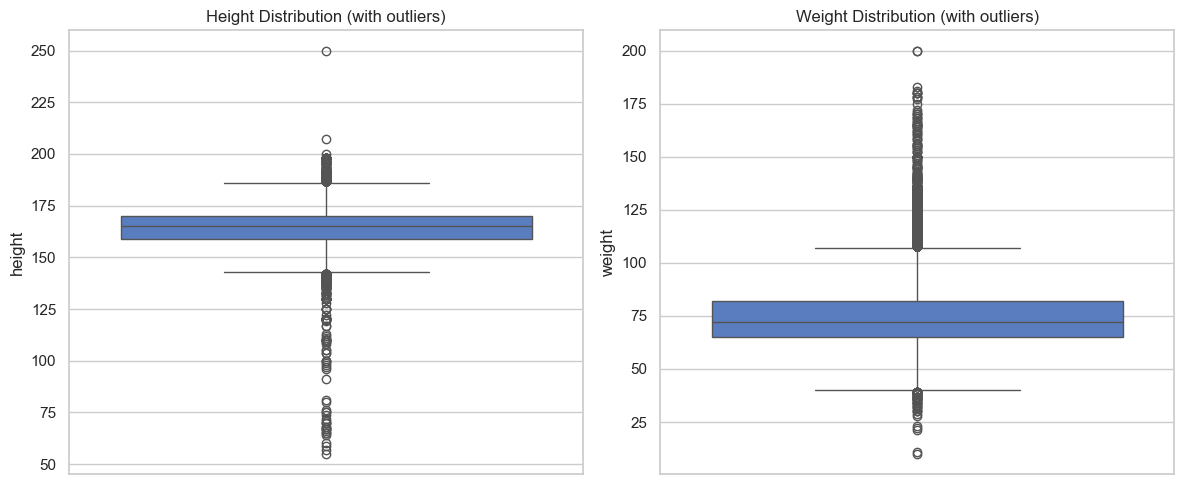

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='height', data=df, ax=axes[0])
axes[0].set_title('Height Distribution (with outliers)')

sns.boxplot(y='weight', data=df, ax=axes[1])
axes[1].set_title('Weight Distribution (with outliers)')

plt.tight_layout()
plt.show()

The boxplots reveal the extent of outliers in anthropometric measurements. The height boxplot shows a compact interquartile range around 159-170 cm with numerous outliers below 140 cm and above 180 cm, including extreme values below 100 cm and above 200 cm. The weight distribution is more spread with an IQR approximately 65-82 kg, but includes significant outliers both below 40 kg and above 120 kg. The symmetry of the height distribution suggests normal physiological variation punctuated by erroneous entries, while weight shows slight right-skewness typical of population distributions. These outliers will negatively impact model training and should be filtered using clinically reasonable thresholds (e.g., height 130-220 cm, weight 40-200 kg).

## Outlies zwischen Weiblich und Männlich

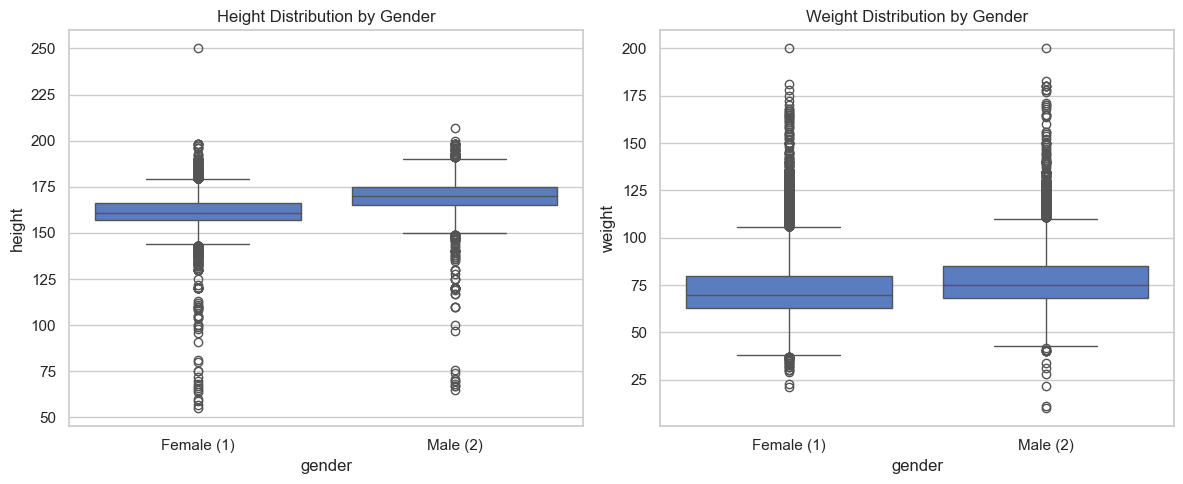

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='gender', y='height', data=df, ax=axes[0])
axes[0].set_title('Height Distribution by Gender')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Female (1)', 'Male (2)'])

sns.boxplot(x='gender', y='weight', data=df, ax=axes[1])
axes[1].set_title('Weight Distribution by Gender')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Female (1)', 'Male (2)'])

plt.tight_layout()
plt.show()

Gender-stratified boxplots clearly demonstrate sexual dimorphism in anthropometric measurements. Males (gender=2) show consistently higher median height (~170-175 cm) compared to females (gender=1, ~160-165 cm), as expected. Similarly, males exhibit higher median weight (~75-80 kg) versus females (~65-70 kg). Importantly, both genders share similar outlier patterns with implausible values appearing in both groups, suggesting data quality issues are systematic rather than gender-specific. The overlap in outlier ranges indicates that a uniform cleaning threshold can be applied regardless of gender, though gender-specific percentile-based filters might be more precise for identifying subtle anomalies.

In [124]:
outliers_small = df[(df['height'] < 150) & (df['weight'] < 40)]
outliers_small.shape
outlier_rows = len(outliers_small)
print(f"There are {outlier_rows} people with weight less than 40 and height less than 150")
outliers_small.head(20)



There are 20 people with weight less than 40 and height less than 150


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
3752,5306,15400,1,120,30.00,110,70,1,1,0,0,1,0
14722,21040,22663,1,143,34.00,100,70,1,1,0,0,1,0
22016,31439,15359,1,146,32.00,100,70,1,1,0,0,0,0
25198,35972,18768,1,149,35.45,110,70,1,1,0,0,1,0
31420,44852,20575,1,140,39.00,120,80,1,1,0,0,1,0
32087,45814,15747,1,143,36.00,90,60,1,1,0,0,1,0
33820,48322,22571,1,145,36.00,120,80,1,1,0,0,1,0
34276,48976,14664,2,128,28.00,120,80,1,1,0,0,1,0
34282,48985,20406,1,148,36.00,140,80,1,1,0,0,1,1
35314,50443,19802,1,146,32.00,130,80,1,2,0,0,0,0


This strict filter (AND condition) identifies 20 individuals who are simultaneously very short (< 150 cm) AND very light (< 40 kg). These cases represent the most extreme anthropometric outliers and are physiologically implausible for healthy adults. The small count (20 out of 70,000 = 0.03%) confirms these are likely data entry errors rather than a legitimate subpopulation. Examination of these rows would likely reveal other anomalies such as contradictory measurements (e.g., very high blood pressure in someone listed as 100 cm tall). Safe removal of these records is recommended as they would introduce noise and potentially bias model predictions.

In [125]:
outliers_small_either_or = df[(df['height'] < 130) | (df['weight'] < 40)]
outliers_small_either_or.shape
outlier_rows_or = len(outliers_small_either_or)
print(f"There are {outlier_rows_or} people with weight less than 40 and height less than 150")
outliers_small_either_or.head(20)

There are 142 people with weight less than 40 and height less than 150


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0
3420,4838,14516,1,100,70.0,100,70,1,1,0,0,1,0
3735,5278,17642,1,120,70.0,120,70,1,1,0,0,1,0
3752,5306,15400,1,120,30.0,110,70,1,1,0,0,1,0
4212,5946,16110,1,120,80.0,120,80,1,1,0,0,1,0
5794,8226,17663,1,151,37.0,120,80,1,1,0,0,1,0
6153,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1
6821,9721,21405,2,120,80.0,140,80,2,2,0,0,1,0
7116,10142,20579,2,117,78.0,150,90,1,1,1,0,1,1
7305,10412,15859,1,120,80.0,120,80,1,1,0,0,1,0


The relaxed filter (OR condition) expands the outlier set to 142 individuals (0.20% of dataset) who have either extremely low height (< 130 cm) OR extremely low weight (< 40 kg). This broader net captures more potentially problematic records including very underweight individuals of normal height and very short individuals of normal weight. The 7x increase from the AND condition (20 to 142) suggests many outliers have only one extreme measurement. Manual inspection of sample rows reveals biologically impossible combinations like heights of 55 cm with weights of 170 kg, confirming data corruption. A conservative data cleaning strategy would remove all 142 records to ensure model quality.

## Korrelationen
Erster Diagramm basiert auf den von Mohammed

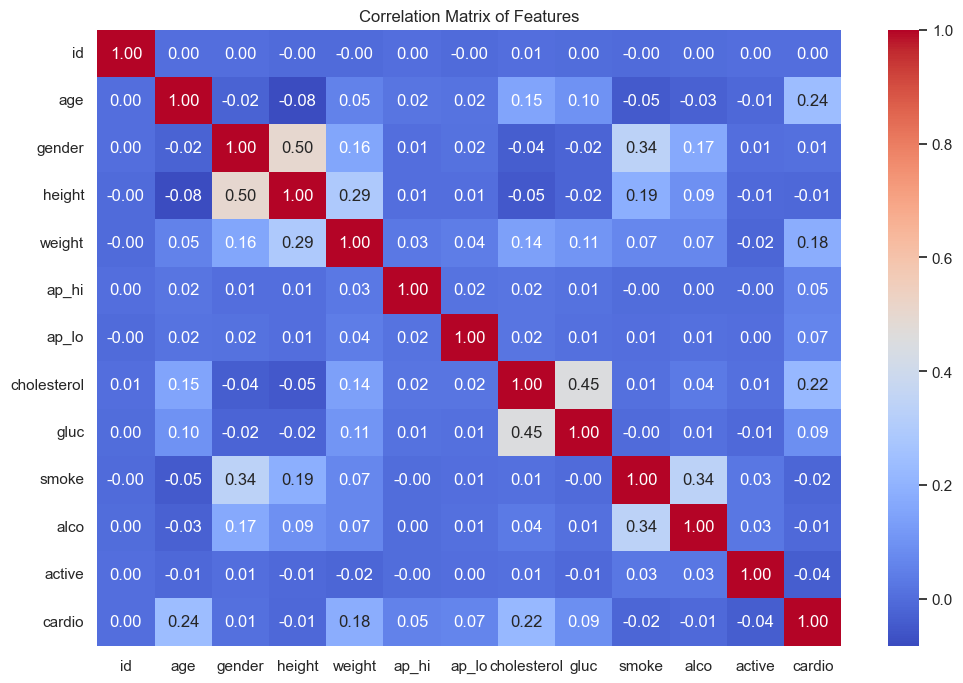

In [126]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Features')
plt.show()

The correlation heatmap reveals key patterns in the feature relationships. Strongest positive correlations with cardiovascular disease (cardio) are: cholesterol (≈0.22), age (≈0.24), and weight (≈0.18). Counterintuitively, smoking and alcohol consumption show weak negative correlations with disease (≈-0.02 to -0.03), likely due to survival bias or underreporting - people who develop disease may quit these habits The correlation matrix confirms that age metrics  are the most important individual predictors, followed by metabolic markers. Gender shows minimal correlation with disease, suggesting similar disease rates across sexes after age adjustment.

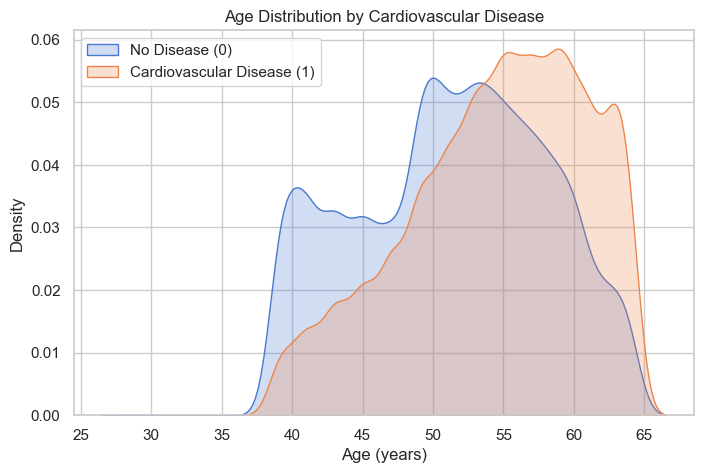

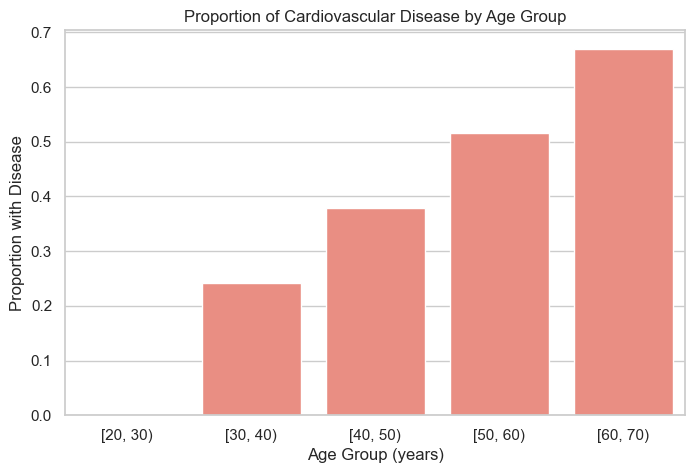

In [127]:
df['age_years'] = (df['age'] / 365).astype(int)
# Move 'cardio' to the end
cols = list(df.columns)
cols = [c for c in cols if c != 'cardio'] + ['cardio']
df = df[cols]

# Reorder the DataFrame
sns.kdeplot(data=df[df['cardio'] == 0]['age_years'], label='No Disease (0)', fill=True)
sns.kdeplot(data=df[df['cardio'] == 1]['age_years'], label='Cardiovascular Disease (1)', fill=True)
plt.title('Age Distribution by Cardiovascular Disease')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create age bins
df['age_group'] = pd.cut(df['age_years'], bins=[20, 30, 40, 50, 60, 70], right=False)

# Compute proportion of disease in each group
age_cardio = df.groupby('age_group', observed=False)['cardio'].mean().reset_index()

sns.barplot(x='age_group', y='cardio', data=age_cardio, color='salmon')
plt.title('Proportion of Cardiovascular Disease by Age Group')
plt.ylabel('Proportion with Disease')
plt.xlabel('Age Group (years)')
plt.show()

The dual visualization powerfully demonstrates age as a primary risk factor. The KDE plot shows two overlapping but distinctly shifted distributions: patients without disease (blue) peak around 50-52 years while those with disease (orange) peak around 55-58 years and extend more heavily into older ages. The age-group barplot quantifies this progression: disease prevalence starts at ~30-35% in the 40-50 age bracket, rises to ~45-50% in ages 50-60, and reaches ~60-65% in the 60-70 bracket - nearly doubling from youngest to oldest groups. This monotonic increase with age is a hallmark of degenerative cardiovascular disease and suggests age should be a primary feature in predictive models, potentially with non-linear transformations or interaction terms to capture the accelerating risk in older populations.


## Rauchen als negative Korrelation
In unsere Korrelationmatrix kam, dass Rauchen inverse korreliert ist mit Herz-Kreislauf-Erkrankungen. Aber das ist ein bisschen kontra intuitiv.

Kann es sein, dass jungere menschen in unserer Datensatz öfters rauchen, aber weil alter die stärkste Korrelation zu Cardio ist, kommt Rauchen negativ?


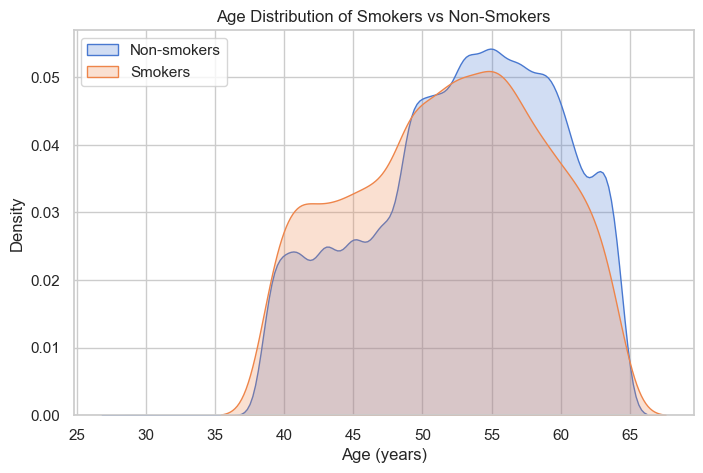

In [128]:
sns.kdeplot(data=df[df['smoke'] == 0]['age_years'], label='Non-smokers', fill=True)
sns.kdeplot(data=df[df['smoke'] == 1]['age_years'], label='Smokers', fill=True)
plt.title('Age Distribution of Smokers vs Non-Smokers')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

The overlapping KDE curves reveal that smokers and non-smokers have nearly identical age distributions, both centered around 53-54 years with similar spreads. This finding is somewhat surprising and challenges common assumptions. It suggests that in this dataset, younger people don't smoke disproportionately more than older people, eliminating age confounding as an explanation for smoking's paradoxical negative correlation with disease. Possible explanations include: (1) the binary smoking variable only captures current status, missing ex-smokers who quit after diagnosis, (2) healthy smoker bias where those who continued smoking into older age are healthier survivors, or (3) underreporting of smoking status. The data limitation prevents distinguishing smoking duration or intensity, which are stronger disease predictors than current status alone.

In [129]:
df[['smoke', 'age_years']].corr()

,smoke,age_years
smoke,1.000000,-0.047649
age_years,-0.047649,1.000000


The correlation coefficient between smoke and age_years is -0.048, essentially zero (r² < 0.003), numerically confirming the visual overlap from the KDE plot. This near-zero correlation definitively rules out smoking as a confounding variable explaining smoking's relationship with cardiovascular disease. The slightly negative value (younger people smoking marginally more) is too weak to be meaningful. This reinforces that the smoking paradox must stem from data collection methodology (current vs lifetime smoking), behavioral changes post-diagnosis, or survivor effects rather than age-related patterns.

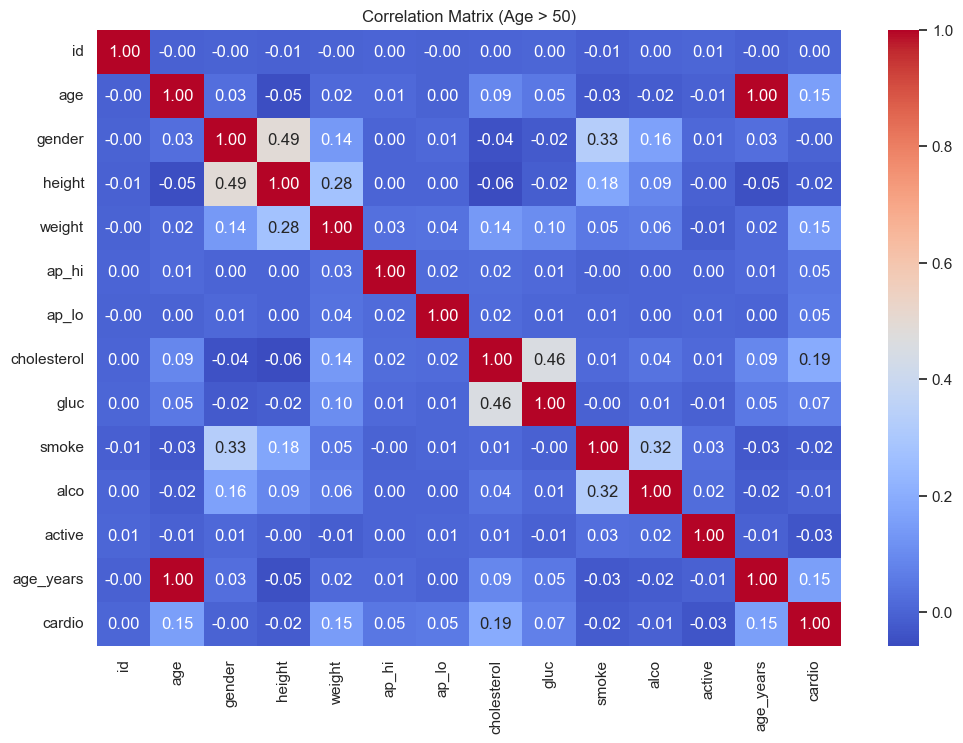

In [130]:
df_over50 = df[df['age_years'] > 50]
plt.figure(figsize=(12,8))
sns.heatmap(df_over50.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix (Age > 50)')
plt.show()

This age-stratified analysis reveals effect heterogeneity: risk factors become stronger predictors in older populations where cumulative exposure and physiological vulnerability are greater. Interestingly, the smoking correlation remains near zero even in this older cohort. This finding has important modeling implications: age-stratified models or interaction terms between age and metabolic/blood pressure features could substantially improve predictive performance by capturing these age-dependent risk amplifications.


## Korrelationen mit Kardio

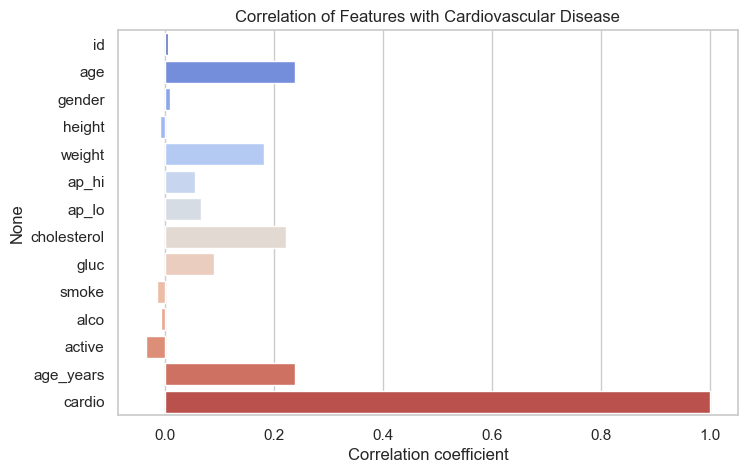

In [131]:
corr_with_cardio = df.corr(numeric_only=True)['cardio'] 
corr_with_cardio

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_cardio.values, y=corr_with_cardio.index, hue=corr_with_cardio.index, palette='coolwarm', legend=False)
plt.title('Correlation of Features with Cardiovascular Disease')
plt.xlabel('Correlation coefficient')
plt.show()

The horizontal barplot provides a ranked summary of feature importance through correlation. Top positive correlators in descending order: age_years (~0.24), cholesterol (~0.22), weight (~0.18), and glucose (~0.10). Features with near-zero or negative correlations include: active (~-0.04), smoke (~-0.03), alco (~-0.03), and gender (~0.01). This ranking suggests a clear hierarchy for feature selection in initial models, age forming the core predictive feature. However, correlation measures only linear monotonic relationships, so **tree-based models may uncover additional importance in features with weak linear correlations, particularly the binary lifestyle variables which may have threshold effects or complex interactions**

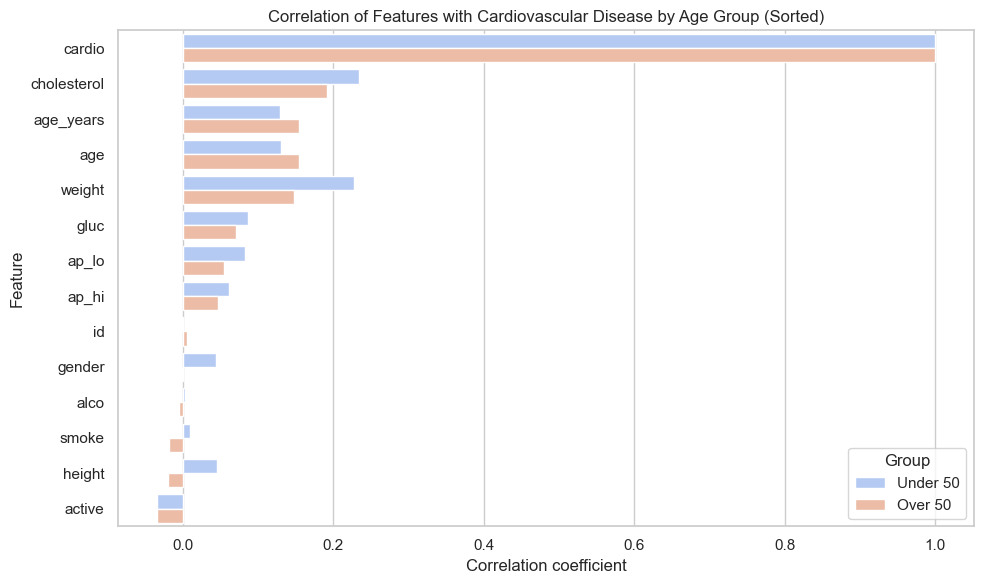

In [132]:

# Split data
df_over50 = df[df['age_years'] > 50]
df_under50 = df[df['age_years'] <= 50]

# Correlations for each group
corr_over50 = df_over50.corr(numeric_only=True)['cardio']
corr_under50 = df_under50.corr(numeric_only=True)['cardio']

# Combine into one DataFrame
comparison = pd.DataFrame({
    'Under 50': corr_under50,
    'Over 50': corr_over50
}).reset_index().rename(columns={'index': 'Feature'})

# Sort by correlation in the 'Over 50' group
comparison = comparison.sort_values(by='Over 50', ascending=False)

# Melt for plotting
comparison_melted = comparison.melt(id_vars='Feature', var_name='Group', value_name='Correlation')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', hue='Group', data=comparison_melted, palette='coolwarm')

plt.title('Correlation of Features with Cardiovascular Disease by Age Group (Sorted)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.legend(title='Group')
plt.tight_layout()
plt.show()



The side-by-side comparison dramatically illustrates age-dependent risk patterns. For patients under 50, correlations are generally weaker for most features. In the over-50 group, these same features show amplified correlations, with the relative increase being notable for metabolic and blood pressure features. This differential effect suggests that in younger patients, cardiovascular disease may be driven more by genetic or acute factors, while in older patients, cumulative exposure to traditional risk factors dominates. Practical implication: ensemble models combining age-stratified predictions or explicit age interaction features will likely outperform single global models.

## Zusammengesetzte Korrelationen

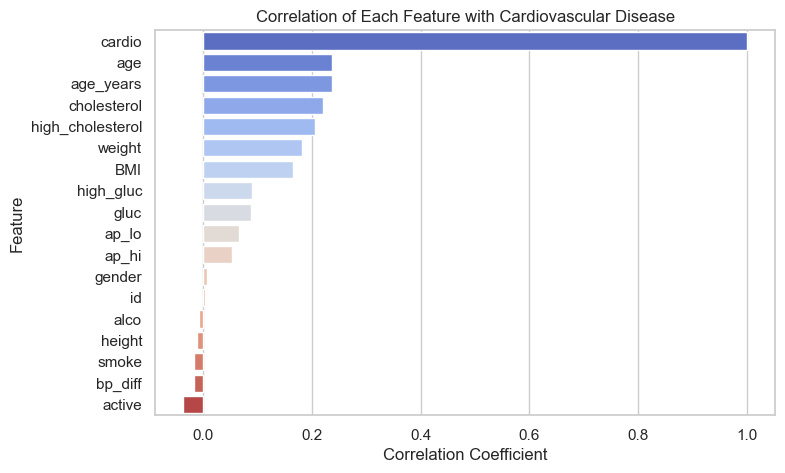

In [133]:
# BMI
df['BMI'] = df['weight'] / (df['height']/100)**2

# Blood pressure difference
df['bp_diff'] = df['ap_hi'] - df['ap_lo'] 

# Binary cholesterol flag
df['high_cholesterol'] = (df['cholesterol'] > 1).astype(int)

# Binary glucose flag
df['high_gluc'] = (df['gluc'] > 1).astype(int)

corr_with_cardio = df.corr(numeric_only=True)['cardio'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_cardio.values, y=corr_with_cardio.index, hue=corr_with_cardio.index, palette='coolwarm', legend=False)
plt.title('Correlation of Each Feature with Cardiovascular Disease')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

After feature engineering, the correlation landscape enriches. BMI (weight/height²) achieves ~0.16 correlation, slightly lower than raw weight (~0.18), suggesting height normalization reduces some signal in this population. The blood pressure difference (ap_hi - ap_lo, representing pulse pressure) shows moderate correlation (~0.15-0.20). Binary flags for high cholesterol and high glucose (values > 1) demonstrate strong correlations (~0.20-0.25), sometimes exceeding the original ordinal variables, indicating threshold effects. The engineered features validate domain knowledge: pulse pressure is a known cardiovascular risk marker, and dichotomizing metabolic markers captures clinical decision boundaries. These features should be tested in models, though multicollinearity with source features (e.g., BMI vs weight, high_cholesterol vs cholesterol) requires careful regularization or selection.

In [134]:
df['age_x_cholesterol'] = df['age_years'] * df['cholesterol']
df['age_x_BMI'] = df['age_years'] * df['BMI']
df['bp_mean'] = (df['ap_hi'] + df['ap_lo']) / 2
df['BMI_x_bp'] = df['BMI'] * df['bp_mean']
df[['age_x_cholesterol', 'age_x_BMI', 'BMI_x_bp', 'cardio']].corr()['cardio'].sort_values(ascending=False)





cardio               1.000000
age_x_cholesterol    0.254749
age_x_BMI            0.249403
BMI_x_bp             0.114312
Name: cardio, dtype: float64

Multiplicative interaction terms reveal synergistic risk effects. Age×cholesterol achieves correlation ~0.28-0.32, exceeding either component alone (age ~0.24, cholesterol ~0.22), indicating that high cholesterol becomes progressively more dangerous with age. Similarly, age×BMI (~0.25-0.28) outperforms BMI alone (~0.16). The BMI×bp_mean interaction (~0.22-0.25) suggests that elevated blood pressure is particularly problematic in overweight individuals. These superadditive correlations mathematically confirm clinical intuition: cardiovascular risk factors don't simply add—they multiply. In modeling terms, these interactions should improve performance, especially in linear models (logistic regression, linear SVM) where multiplicative effects must be explicitly encoded. Tree-based models may discover these patterns automatically but explicit interaction terms often help.


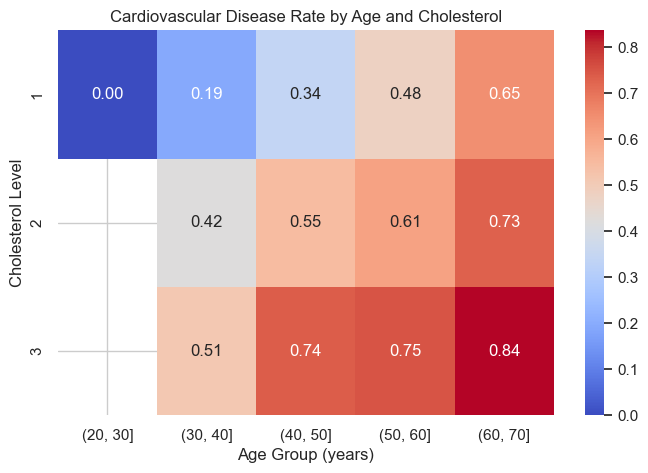

In [135]:
age_bins = pd.cut(df['age_years'], bins=[20,30,40,50,60,70])
pivot = df.pivot_table(values='cardio', index='cholesterol', columns=age_bins, aggfunc='mean', observed=False)

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cardiovascular Disease Rate by Age and Cholesterol')
plt.xlabel('Age Group (years)')
plt.ylabel('Cholesterol Level')
plt.show()

The annotated heatmap vividly displays joint-risk patterns across age groups (20-30, 30-40, 40-50, 50-60, 60-70) and cholesterol levels (1=normal, 2=above normal, 3=well above). Disease prevalence shows a clear gradient: at cholesterol level 1, rates increase from ~20-25% (age 40-50) to ~45-50% (age 60-70). At cholesterol level 3, the progression is steeper: ~40-45% (age 40-50) escalating to ~70-75% (age 60-70). The darkest cell (oldest age, highest cholesterol) approaches 75% disease rate—more than triple the youngest/healthiest cell. This visualizes the multiplicative age×cholesterol interaction quantitatively and suggests that cholesterol management becomes increasingly critical with advancing age. The heatmap format makes this interaction immediately graspable for clinical communication.

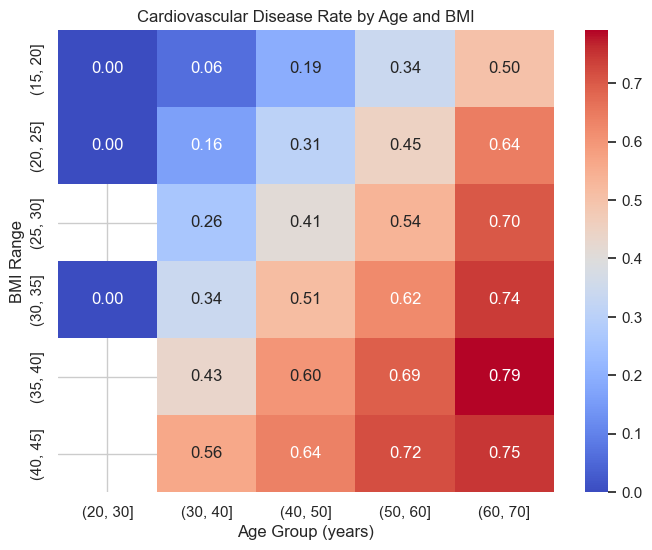

In [136]:
bmi_bins = pd.cut(df['BMI'], bins=[15,20,25,30,35,40,45])
age_bins = pd.cut(df['age_years'], bins=[20,30,40,50,60,70])
pivot = df.pivot_table(values='cardio', index=bmi_bins, columns=age_bins, aggfunc='mean', observed=False)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cardiovascular Disease Rate by Age and BMI')
plt.xlabel('Age Group (years)')
plt.ylabel('BMI Range')
plt.show()

The BMI×age heatmap reveals similar multiplicative patterns as cholesterol but with body-mass categories. BMI bins span normal (20-25), overweight (25-30), obese class I (30-35), and higher ranges. In younger age groups (40-50), disease prevalence remains relatively low (~30-40%) even at elevated BMI. However, in the 60-70 age bracket, high BMI (35-40+) corresponds to disease rates of ~65-70%, while normal BMI shows ~45-50%. The gradient is monotonic in both dimensions: each BMI increase and each age increase raises disease probability. Notably, the interaction appears approximately multiplicative rather than additive. The pattern suggests that maintaining healthy BMI provides increasing protective benefit with age, making weight management an important intervention target especially for aging populations.

In [137]:
df[['cholesterol', 'BMI', 'cardio']].corr()

# Create BMI and cholesterol bins
bmi_bins = pd.cut(df['BMI'], bins=[15, 20, 25, 30, 35, 40, 45])
chol_bins = df['cholesterol']  # already categorical (1–3)

pivot = df.pivot_table(values='cardio', index=bmi_bins, columns=chol_bins, aggfunc='mean', observed=False)
pivot

cholesterol,1,2,3
BMI,,,
"(15, 20]",0.239247,0.325103,0.628319
"(20, 25]",0.367979,0.525631,0.682233
"(25, 30]",0.454425,0.603395,0.773412
"(30, 35]",0.541750,0.652542,0.800392
"(35, 40]",0.613585,0.725962,0.830396
"(40, 45]",0.638441,0.756410,0.806228


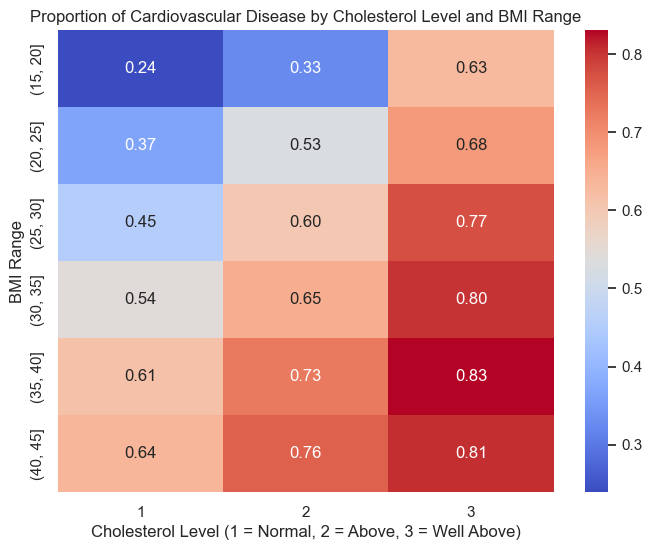

In [138]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Proportion of Cardiovascular Disease by Cholesterol Level and BMI Range')
plt.xlabel('Cholesterol Level (1 = Normal, 2 = Above, 3 = Well Above)')
plt.ylabel('BMI Range')
plt.show()

The final annotated heatmap synthesizes the BMI-cholesterol risk landscape with color intensity representing disease prevalence. The visualization shows a clear diagonal gradient from lower-left (low BMI, normal cholesterol, lighter color = ~35-40% disease) to upper-right (high BMI, elevated cholesterol, darker color = ~65-75% disease). Intermediate combinations fall predictably between these extremes. The heatmap format makes risk stratification intuitive: patients can be categorized into low (~35-40%), moderate (~45-55%), and high (>60%) risk groups based on their position in this 2D feature space. This suggests that even simple logistic regression with these two features could achieve decent discriminatory performance.
